Давыдов ПИм-231 лаба 4 ммо

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import decomposition

In [ ]:
df = pd.read_excel("ATEROSKLEROZ++10.02.23.xls")
df

,Болен/Здоров,№,GPx1,MnSOD,MTHFR,MTR,CAT,TP53,GSTP105,GSTP114,...,дата общего анализа мочи,удельный вес мочи,белок,Дата ОАК,Hb min,ОАК эритроциты,ОАК лейкоциты,С,П.,Тр
0,АТЕРОСКЛЕРОЗ,1,CC,CC,CT,AA,CT,CC,GG,CC,...,2011-02-19 00:00:00,1012,отр,2011-03-22 00:00:00,138,4.89,5.9,51,2,269
1,АТЕРОСКЛЕРОЗ,2,CT,TT,CC,AA,CC,GC,AG,CC,...,2011-03-17 00:00:00,1020,отр,2011-03-17 00:00:00,145,4.74,5.2,59,1,215
2,АТЕРОСКЛЕРОЗ,3,CT,CT,CC,AG,CC,GC,AG,CC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,АТЕРОСКЛЕРОЗ,4,CC,CC,CC,AG,CC,GC,AG,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,АТЕРОСКЛЕРОЗ,5,CT,CT,CC,AG,CC,GG,GG,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,Здоров,1487,СС,СТ,СС,АА,CT,GC,AG,CT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1469,Здоров,1488,ТТ,ТТ,СТ,АА,CT,GC,AA,CC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1470,Здоров,1489,СТ,СС,СС,АА,CT,GG,AA,CC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1471,Здоров,1490,СС,СТ,СС,AG,CC,GC,AG,CC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Болен/Здоров'].value_counts()

АТЕРОСКЛЕРОЗ    757
Здоров          716
Name: Болен/Здоров, dtype: int64

In [ ]:
col_list = []
for i in range(len(df.columns)):
    if len(df[df.columns[i]][df[df.columns[i]].notna()]) < 800:
        col_list.append(df.columns[i])

df = df.drop(labels=col_list, axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Болен/Здоров                  1473 non-null   object 
 1   №                             1473 non-null   int64  
 2   GPx1                          1400 non-null   object 
 3   MnSOD                         1345 non-null   object 
 4   MTHFR                         1053 non-null   object 
 5   MTR                           1293 non-null   object 
 6   CAT                           1379 non-null   object 
 7   TP53                          1400 non-null   object 
 8   GSTP105                       1154 non-null   object 
 9   GSTP114                       1144 non-null   object 
 10  FTOrs9939609                  1268 non-null   object 
 11  ADRB3rs4994                   1270 non-null   object 
 12  FABP2rs1799883                1102 non-null   object 
 13  PPA

,Болен/Здоров,№,GPx1,MnSOD,MTHFR,MTR,CAT,TP53,GSTP105,GSTP114,FTOrs9939609,ADRB3rs4994,FABP2rs1799883,PPARG rs1801282,Пол,Возраст (на момент операции),Национальность,Курение
0,АТЕРОСКЛЕРОЗ,1,CC,CC,CT,AA,CT,CC,GG,CC,TA,TC,G/G,C/G,м,59.0,Русский,Бросил
1,АТЕРОСКЛЕРОЗ,2,CT,TT,CC,AA,CC,GC,AG,CC,TA,TT,G/G,C/C,NaN,NaN,русский,Бросил
2,АТЕРОСКЛЕРОЗ,3,CT,CT,CC,AG,CC,GC,AG,CC,TA,TT,G/G,C/C,м,56.0,Русский,Бросил
3,АТЕРОСКЛЕРОЗ,4,CC,CC,CC,AG,CC,GC,AG,CT,TT,TT,G/G,C/C,м,67.0,Русский,Курит
4,АТЕРОСКЛЕРОЗ,5,CT,CT,CC,AG,CC,GG,GG,CT,AA,TT,G/G,C/G,NaN,NaN,"русский, кемерово",Никогда не курил
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,Здоров,1487,СС,СТ,СС,АА,CT,GC,AG,CT,TA,TC,G/G,C/C,м,42.0,русский,Никогда не курил
1469,Здоров,1488,ТТ,ТТ,СТ,АА,CT,GC,AA,CC,TA,TT,G/G,C/C,ж,57.0,русский,Курит
1470,Здоров,1489,СТ,СС,СС,АА,CT,GG,AA,CC,TA,TC,G/A,C/G,м,37.0,русский,Курит
1471,Здоров,1490,СС,СТ,СС,AG,CC,GC,AG,CC,AA,TT,G/G,C/G,м,48.0,русский,Никогда не курил


In [ ]:
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,Болен/Здоров,№,GPx1,MnSOD,MTHFR,MTR,CAT,TP53,GSTP105,GSTP114,FTOrs9939609,ADRB3rs4994,FABP2rs1799883,PPARG rs1801282,Пол,Возраст (на момент операции),Национальность,Курение
0,АТЕРОСКЛЕРОЗ,1,CC,CC,CT,AA,CT,CC,GG,CC,TA,TC,G/G,C/G,м,59.0,Русский,Бросил
1,АТЕРОСКЛЕРОЗ,3,CT,CT,CC,AG,CC,GC,AG,CC,TA,TT,G/G,C/C,м,56.0,Русский,Бросил
2,АТЕРОСКЛЕРОЗ,4,CC,CC,CC,AG,CC,GC,AG,CT,TT,TT,G/G,C/C,м,67.0,Русский,Курит
3,АТЕРОСКЛЕРОЗ,6,CC,CC,CT,AG,CC,GG,AG,CC,TA,TT,G/G,C/G,м,69.0,Украинец,Бросил
4,АТЕРОСКЛЕРОЗ,9,CT,TT,CT,AA,CT,GG,AA,CC,TA,TT,G/G,C/C,м,60.0,Русский,Курит
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Здоров,1486,СС,ТТ,СТ,АА,CC,GG,AG,CC,TT,TT,G/G,C/C,м,42.0,русский,Курит
758,Здоров,1487,СС,СТ,СС,АА,CT,GC,AG,CT,TA,TC,G/G,C/C,м,42.0,русский,Никогда не курил
759,Здоров,1488,ТТ,ТТ,СТ,АА,CT,GC,AA,CC,TA,TT,G/G,C/C,ж,57.0,русский,Курит
760,Здоров,1489,СТ,СС,СС,АА,CT,GG,AA,CC,TA,TC,G/A,C/G,м,37.0,русский,Курит


In [ ]:
df['Болен/Здоров'].value_counts()

Здоров          527
АТЕРОСКЛЕРОЗ    235
Name: Болен/Здоров, dtype: int64

In [ ]:
df = df.replace({'GPx1':{'CC':'СС', 'CT':'СТ', 'TT':'ТТ'},
                   'MnSOD':{'CC':'СС', 'CT':'СТ', 'TT':'ТТ'},
                   'MTHFR':{'CC':'СС', 'CT':'СТ', 'TT':'ТТ'},
                   'MTR':{'AA':'АА'},
                   'GSTP114':{'C/C':'CC', 'C/T':'CT', 'T/T':'TT'},
                   'Национальность':{'Украинец':'украинец', 'Украинец ':'украинец', 'Немец':'немец'},
                   'Болен/Здоров':{'АТЕРОСКЛЕРОЗ':'0', 'Здоров':'1'}})

for i in range(df.shape[0]): # поиск по подстроке
    if 'усск' in df['Национальность'].iloc[i]:
        df['Национальность'].iloc[i] = 'русский'

df = df.drop('№', axis=1)
df

<ipython-input-63-5bdedc1f3b82>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Национальность'].iloc[i] = 'русский'


,Болен/Здоров,GPx1,MnSOD,MTHFR,MTR,CAT,TP53,GSTP105,GSTP114,FTOrs9939609,ADRB3rs4994,FABP2rs1799883,PPARG rs1801282,Пол,Возраст (на момент операции),Национальность,Курение
0,0,СС,СС,СТ,АА,CT,CC,GG,CC,TA,TC,G/G,C/G,м,59.0,русский,Бросил
1,0,СТ,СТ,СС,AG,CC,GC,AG,CC,TA,TT,G/G,C/C,м,56.0,русский,Бросил
2,0,СС,СС,СС,AG,CC,GC,AG,CT,TT,TT,G/G,C/C,м,67.0,русский,Курит
3,0,СС,СС,СТ,AG,CC,GG,AG,CC,TA,TT,G/G,C/G,м,69.0,украинец,Бросил
4,0,СТ,ТТ,СТ,АА,CT,GG,AA,CC,TA,TT,G/G,C/C,м,60.0,русский,Курит
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,1,СС,ТТ,СТ,АА,CC,GG,AG,CC,TT,TT,G/G,C/C,м,42.0,русский,Курит
758,1,СС,СТ,СС,АА,CT,GC,AG,CT,TA,TC,G/G,C/C,м,42.0,русский,Никогда не курил
759,1,ТТ,ТТ,СТ,АА,CT,GC,AA,CC,TA,TT,G/G,C/C,ж,57.0,русский,Курит
760,1,СТ,СС,СС,АА,CT,GG,AA,CC,TA,TC,G/A,C/G,м,37.0,русский,Курит


In [ ]:
cat_col = ['GPx1', 'MnSOD', 'MTHFR', 'MTR', 'CAT',
           'TP53', 'GSTP105', 'GSTP114', 'FTOrs9939609',
           'ADRB3rs4994', 'FABP2rs1799883', 'PPARG rs1801282', 'Пол',
           'Национальность', 'Курение']
df = pd.get_dummies(df, columns=cat_col)
df

,Болен/Здоров,Возраст (на момент операции),GPx1_ CC,GPx1_СС,GPx1_СТ,GPx1_ТТ,MnSOD_СС,MnSOD_СТ,MnSOD_ТТ,MTHFR_СС,...,Национальность_Азербайджанец,Национальность_Белорус,Национальность_немец,Национальность_русский,Национальность_татарин,Национальность_украинец,Национальность_чуваш,Курение_Бросил,Курение_Курит,Курение_Никогда не курил
0,0,59.0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,56.0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,67.0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,69.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,60.0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,1,42.0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
758,1,42.0,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
759,1,57.0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
760,1,37.0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Болен/Здоров                  762 non-null    object 
 1   Возраст (на момент операции)  762 non-null    float64
 2   GPx1_  CC                     762 non-null    uint8  
 3   GPx1_СС                       762 non-null    uint8  
 4   GPx1_СТ                       762 non-null    uint8  
 5   GPx1_ТТ                       762 non-null    uint8  
 6   MnSOD_СС                      762 non-null    uint8  
 7   MnSOD_СТ                      762 non-null    uint8  
 8   MnSOD_ТТ                      762 non-null    uint8  
 9   MTHFR_СС                      762 non-null    uint8  
 10  MTHFR_СТ                      762 non-null    uint8  
 11  MTHFR_ТТ                      762 non-null    uint8  
 12  MTR_AG                        762 non-null    uint8  
 13  MTR_G

In [ ]:
y = df['Болен/Здоров']
X = df.drop('Болен/Здоров', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

Строим модели классификации и кластеризации на НЕ масштабированных данных.

In [ ]:
svm = SVC(kernel ='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.54      0.65        78
           1       0.80      0.94      0.86       151

    accuracy                           0.80       229
   macro avg       0.81      0.74      0.76       229
weighted avg       0.81      0.80      0.79       229



In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71        78
           1       0.82      0.95      0.88       151

    accuracy                           0.83       229
   macro avg       0.85      0.78      0.80       229
weighted avg       0.84      0.83      0.83       229



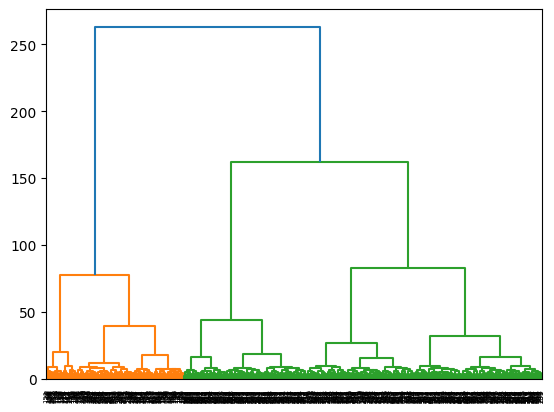

In [ ]:
link = linkage(X, 'ward', 'euclidean')
dn = dendrogram(link)

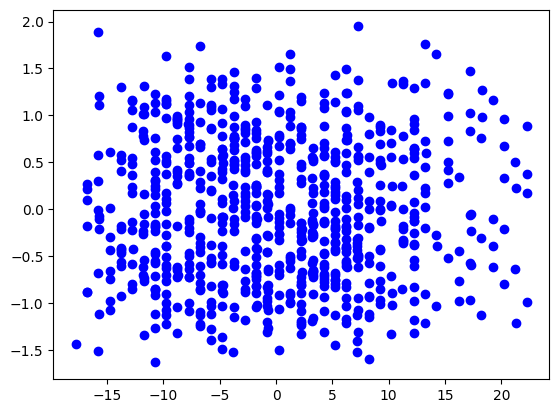

In [ ]:
pca = decomposition.PCA(n_components=5)
X_pca = pca.fit_transform(X)
for i in range(len(X_pca)):
    plt.plot(X_pca[i][0], X_pca[i][1], 'bo')
plt.show()

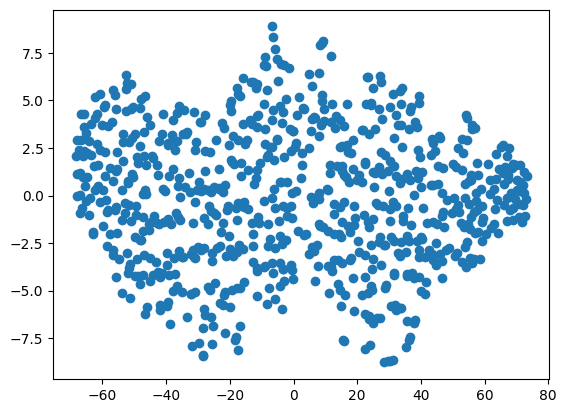

In [ ]:
model = TSNE(random_state=42, learning_rate=100, n_components=2)
transformed = model.fit_transform(X)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

Ничего не понятно, теперь скалируем данные.

In [ ]:
scale = StandardScaler()
X_scale = scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, random_state=42, test_size=0.3)

In [ ]:
svm = SVC(kernel ='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print('SVM\n')
print(classification_report(y_test, y_pred))
print('\n')

print('Random Forest\n')
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('\n')

SVM

              precision    recall  f1-score   support

           0       0.83      0.55      0.66        78
           1       0.80      0.94      0.87       151

    accuracy                           0.81       229
   macro avg       0.81      0.75      0.76       229
weighted avg       0.81      0.81      0.80       229



Random Forest

              precision    recall  f1-score   support

           0       0.86      0.56      0.68        78
           1       0.81      0.95      0.88       151

    accuracy                           0.82       229
   macro avg       0.84      0.76      0.78       229
weighted avg       0.83      0.82      0.81       229





Dendrogram



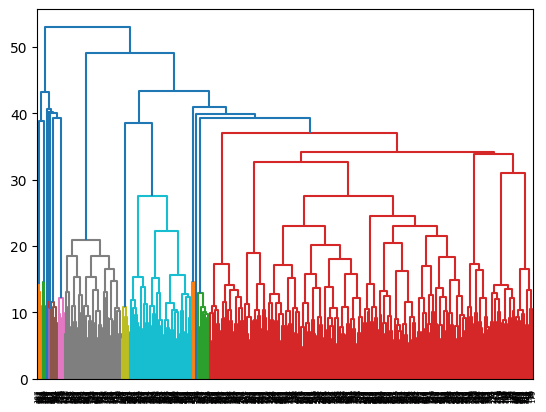

In [ ]:
print('Dendrogram\n')
link = linkage(X_scale, 'ward', 'euclidean')
dn = dendrogram(link)

PCA



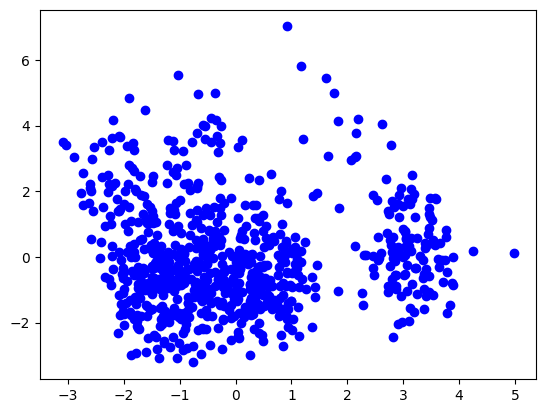

In [ ]:
print('PCA\n')
pca = decomposition.PCA(n_components=5)
X_pca = pca.fit_transform(X_scale)
for i in range(len(X_pca)):
    plt.plot(X_pca[i][0], X_pca[i][1], 'bo')
plt.show()

TSNE



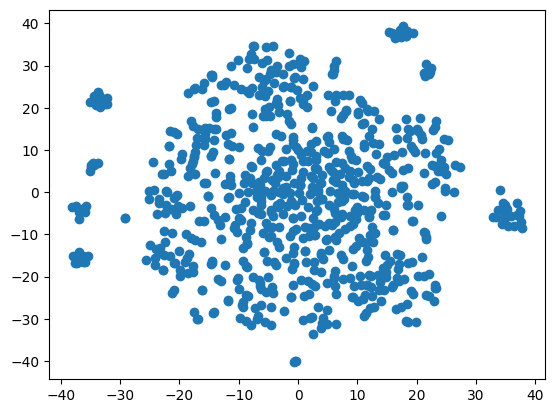

In [ ]:
print('TSNE\n')
model = TSNE(random_state=42, learning_rate=100, n_components=2)
transformed = model.fit_transform(X_scale)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis)
plt.show()

Судя по PCA можно разделить пациентов на две каких-то категории.